# Type 1 transition 

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pylab as plt
%matplotlib inline
from tyssue import Sheet, SheetGeometry, config
# What we're here for
from tyssue.topology.sheet_topology import type1_transition

## model and solver
from tyssue.dynamics.sheet_vertex_model import SheetModel
from tyssue.solvers.sheet_vertex_solver import Solver
from tyssue.dynamics.sheet_isotropic_model import isotropic_relax

# 2D plotting
from tyssue.draw.plt_draw import sheet_view, quick_edge_draw
import tyssue.draw.plt_draw as draw
#I/O
from tyssue.io import hdf5
plt.style.use('bmh')

import logging


![Type 1 transition](../../doc/illus/t1_transition.png)

Reseting datasets values with new specs


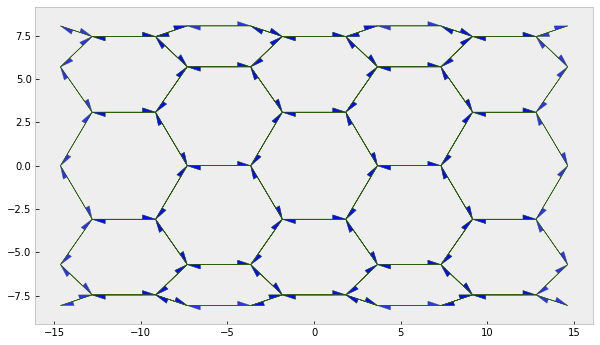

In [2]:
h5store = 'data/small_hexagonal.hf5'
datasets = hdf5.load_datasets(h5store,
                              data_names=['face', 'vert', 'edge'])
specs = config.geometry.cylindrical_sheet()
sheet = Sheet('emin', datasets, specs)


SheetGeometry.update_all(sheet)

nondim_specs = config.dynamics.quasistatic_sheet_spec()
dim_model_specs = SheetModel.dimensionalize(nondim_specs)
sheet.update_specs(dim_model_specs, reset=True)
sheet.grad_norm_factor = sheet.specs['settings']['grad_norm_factor']
sheet.nrj_norm_factor = sheet.specs['settings']['nrj_norm_factor']

isotropic_relax(sheet, nondim_specs)

solver_settings = {
    'minimize': {
        'options': {'disp':True,
        'gtol':1e-4},
        }
    }

sheet.get_opposite()
active_edges = (sheet.edge_df['opposite'] > -1).astype(bool)
active_verts = set(sheet.edge_df[active_edges]['srce'])
sheet.vert_df.is_active = 0
sheet.vert_df.loc[active_verts, 'is_active'] = 1

fig, ax = sheet_view(sheet, ['z', 'x'],
                     edge={'head_width': 0.5},
                     vert={'visible': False})
fig.set_size_inches(10, 6)


True


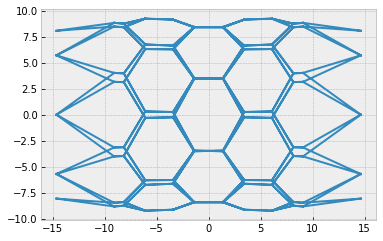

In [3]:

res = Solver.find_energy_min(sheet, SheetGeometry, SheetModel, pos_idx=active_verts, 
                             **solver_settings)
print(res['success'])
fig, ax = quick_edge_draw(sheet, ['z', 'x'])

In [4]:
from tyssue.topology.sheet_topology import type1_transition

type1_transition(sheet, 44)
SheetGeometry.update_all(sheet)
sheet.validate()


In [5]:
type1_transition(sheet, 84)
SheetGeometry.update_all(sheet)


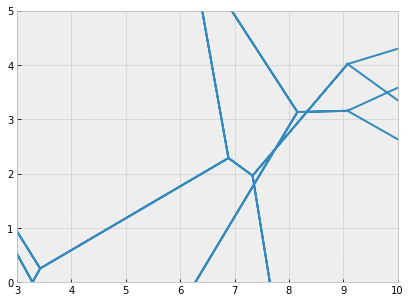

In [6]:

fig, ax = quick_edge_draw(sheet, ['z', 'x'])

ax.set_xlim(3, 10)
ax.set_ylim(0, 5)

ax.set_aspect('equal')
fig.set_size_inches(8, 5)


True


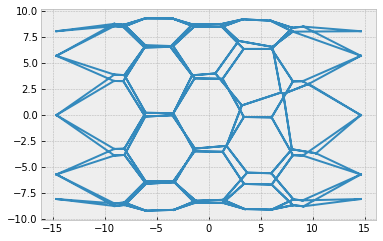

In [12]:
settings = {
    'minimize': {
        'options': {'disp':True,
        'gtol':1e-6},
        }
    }


res = Solver.find_energy_min(sheet, SheetGeometry,
                             SheetModel, **settings)
print(res['success'])
fig, ax = quick_edge_draw(sheet, ['z', 'x'])

In [16]:
import tempfile

In [23]:
tf = tempfile.mktemp()

In [24]:
tf

'/tmp/tmpwb4069s8'

In [13]:
sheet.validate()

True

#### Type 1 transitions can also be performed on edge faces

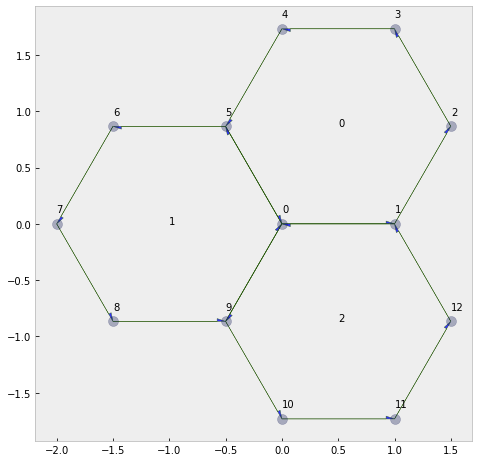

In [14]:
from tyssue.generation import three_faces_sheet

sheet = Sheet('3f', *three_faces_sheet())
SheetGeometry.update_all(sheet)
fig, ax = sheet_view(sheet, edge={'head_width': 0.05})
fig.set_size_inches(8, 8)

for face, data in sheet.face_df.iterrows():
    ax.text(data.x, data.y, face)
for vert, data in sheet.vert_df.iterrows():
    ax.text(data.x, data.y+0.1, vert)



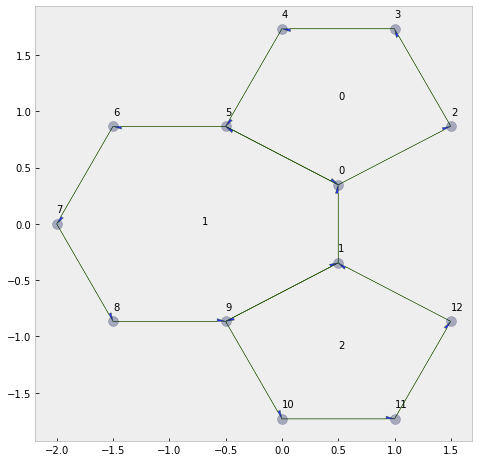

In [17]:

type1_transition(sheet, 0, epsilon=0.4)
sheet.reset_index()

SheetGeometry.update_all(sheet)

fig, ax = sheet_view(sheet, edge={'head_width': 0.05})
fig.set_size_inches(8, 8)
for face, data in sheet.face_df.iterrows():
    ax.text(data.x, data.y, face)

for vert, data in sheet.vert_df.iterrows():
    ax.text(data.x, data.y+0.1, vert)

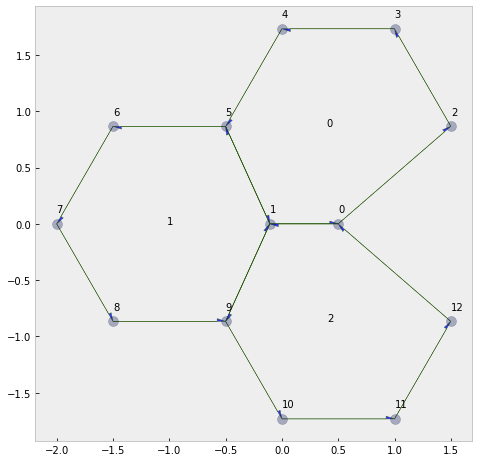

In [18]:
type1_transition(sheet, 16, epsilon=0.5)

SheetGeometry.update_all(sheet)

fig, ax = sheet_view(sheet, edge={'head_width': 0.05})
fig.set_size_inches(8, 8)
for face, data in sheet.face_df.iterrows():
    ax.text(data.x, data.y, face)

for vert, data in sheet.vert_df.iterrows():
    ax.text(data.x, data.y+0.1, vert)

In [19]:
sheet.validate()

True

True


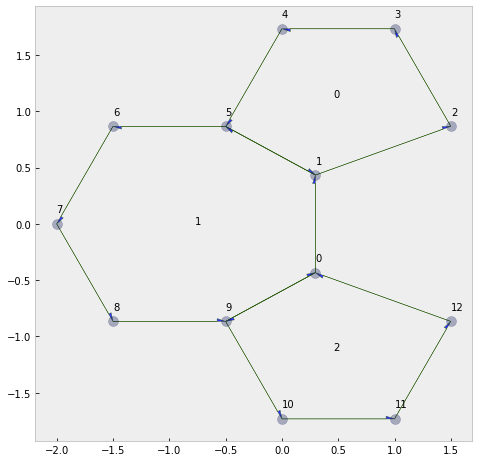

In [20]:
type1_transition(sheet, 17, epsilon=0.5)

SheetGeometry.update_all(sheet)
print(sheet.validate())

fig, ax = sheet_view(sheet, edge={'head_width': 0.05})
fig.set_size_inches(8, 8)
for face, data in sheet.face_df.iterrows():
    ax.text(data.x, data.y, face)

for vert, data in sheet.vert_df.iterrows():
    ax.text(data.x, data.y+0.1, vert)